<a href="https://colab.research.google.com/github/Dorsaf-Sdiri/Time-series-Analysis/blob/master/Time_series_sale_seasonlity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from google.colab import files
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Determine the sales periods, estimate the discount percentage that was applied
during the sales, explore the data set, find ways to quantify differences between the
two periods, and search for trends and patterns

In [0]:
uploaded = files.upload()

Saving Recrutiment.csv to Recrutiment.csv


In [0]:
Recrutiment = pd.read_csv("Recrutiment.csv")

In [0]:
# the type of our variables is object we need to convert it to numeric 
mylist = ['Base Price','Sale Price','Gross Sales (USD)','Returns (USD)', 'VAT/Tax (USD)','Net Sales (USD)']
df = Recrutiment[mylist]
data = df.apply(lambda x:x.str.replace(',', '.').astype(float), axis=1)
Recrutiment['Base Price']=data['Base Price']
Recrutiment['Sale Price']=data['Sale Price']
Recrutiment['Gross Sales (USD)']=data['Gross Sales (USD)']
Recrutiment['Returns (USD)']=data['Returns (USD)']
Recrutiment['VAT/Tax (USD)']=data['VAT/Tax (USD)']
Recrutiment['Net Sales (USD)']=data['Net Sales (USD)']

In [0]:
Recrutiment.describe()

,Package,Product(ID#),Gross Units Sold,Returns,Net Units Sold,Base Price,Sale Price,Gross Sales (USD),Returns (USD),VAT/Tax (USD),Net Sales (USD)
count,7636.0,7636.0,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000
mean,-1.0,91203.0,14.604112,1.689890,12.914222,2100.259810,1627.116960,248.323921,28.240493,-10.623679,209.459749
std,0.0,0.0,111.726437,8.487162,103.923956,14833.274549,11133.476778,1865.259902,140.542828,52.450715,1717.895432
min,-1.0,91203.0,0.000000,-2.000000,-45.000000,4.250000,2.550000,0.000000,-39.980000,-1902.319284,-764.550000
25%,-1.0,91203.0,2.000000,0.000000,2.000000,22.990000,16.990000,25.028450,0.000000,-8.116400,21.210000
50%,-1.0,91203.0,2.000000,0.000000,2.000000,24.990000,22.990000,48.800000,0.000000,0.000000,39.953400
75%,-1.0,91203.0,5.000000,2.000000,5.000000,78.000000,78.000000,89.950000,31.200000,0.000000,74.970000
max,-1.0,91203.0,4679.000000,239.000000,4440.000000,220000.000000,169999.000000,79984.489271,4074.562887,17.584700,75435.600000


##  Univariate Analysis

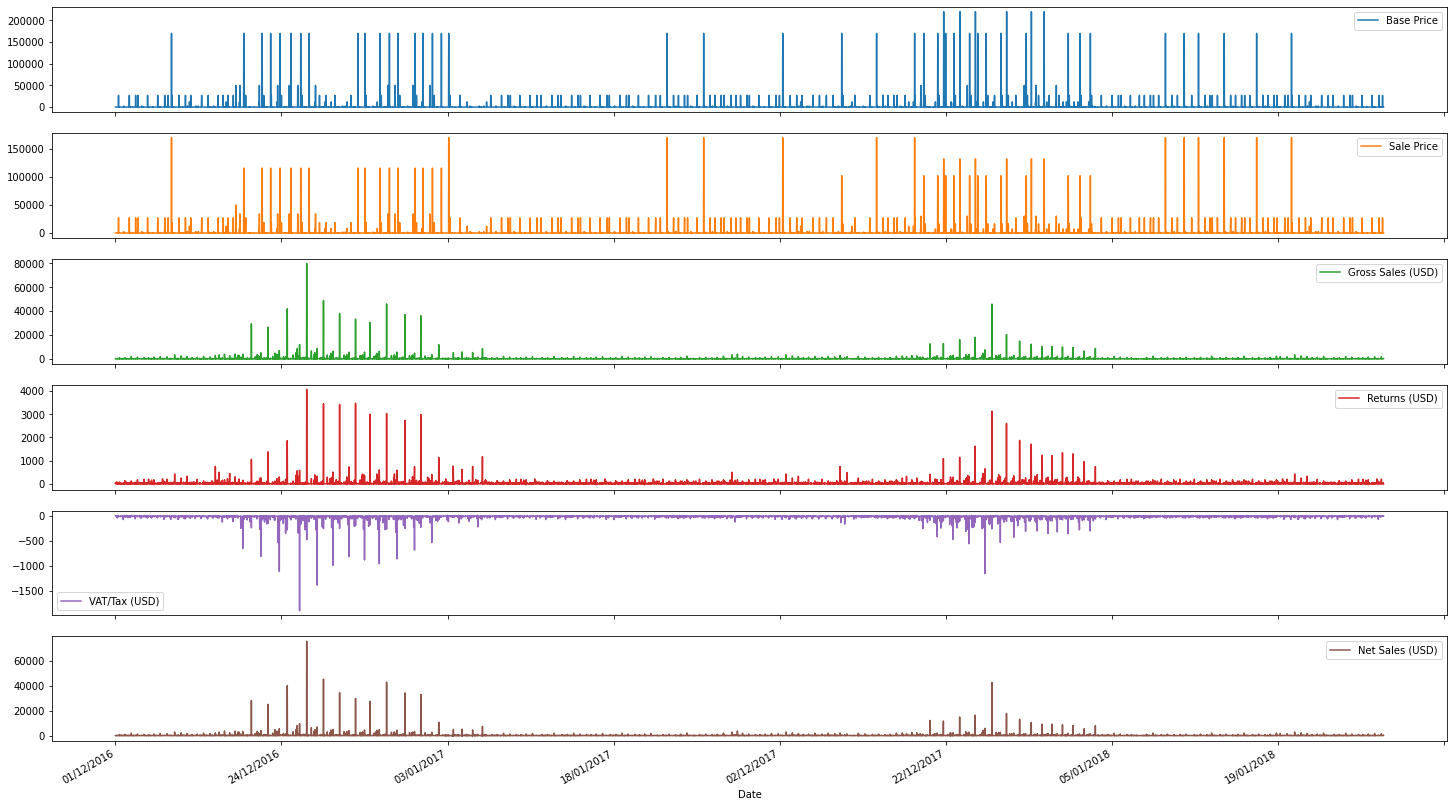

In [0]:
Recrutiment[['Date', 'Base Price','Sale Price','Gross Sales (USD)','Returns (USD)', 'VAT/Tax (USD)','Net Sales (USD)']].plot(x='Date', subplots=True, figsize=(25,15))
plt.show()

In [0]:
#convert to date to datetime the to DateIndex to perform Time Series Analysis
from datetime import datetime
datelist = []
for i in range(0,7636):
  newdate = datetime.strptime(Recrutiment['Date'][i], '%d/%m/%Y')
  datelist.append(newdate)

In [0]:
Recrutiment = pd.read_csv("Recrutiment.csv")
mylist = ['Base Price','Sale Price','Gross Sales (USD)','Returns (USD)', 'VAT/Tax (USD)','Net Sales (USD)']
df = Recrutiment[mylist]
data = df.apply(lambda x:x.str.replace(',', '.').astype(float), axis=1)
Recrutiment['Base Price']=data['Base Price']
Recrutiment['Sale Price']=data['Sale Price']
Recrutiment['Gross Sales (USD)']=data['Gross Sales (USD)']
Recrutiment['Returns (USD)']=data['Returns (USD)']
Recrutiment['VAT/Tax (USD)']=data['VAT/Tax (USD)']
Recrutiment['Net Sales (USD)']=data['Net Sales (USD)']

In [0]:
#Aggregation by day
Recrutiment['Date2'] = datelist
NEWRecrutiment4 = Recrutiment.groupby(['Date2']).sum()
NEWRecrutiment4['Date'] = NEWRecrutiment4.index
NEWRecrutiment3 = Recrutiment.groupby(['Date']).mean()
Recrutiment = Recrutiment.set_index('Date2')

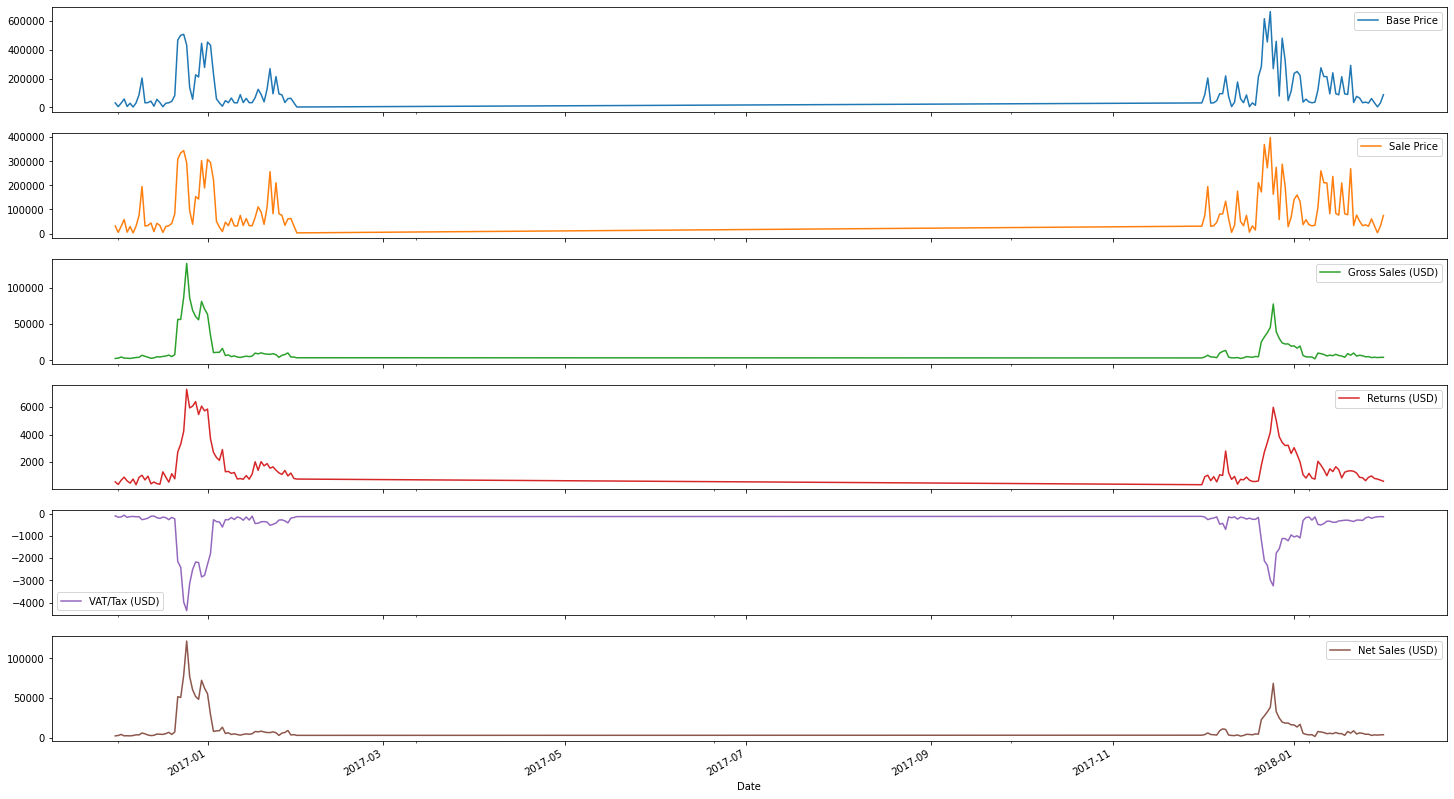

In [0]:
NEWRecrutiment4[['Date','Base Price','Sale Price','Gross Sales (USD)','Returns (USD)', 'VAT/Tax (USD)','Net Sales (USD)']].plot(x='Date', subplots=True, figsize=(25,15))
plt.show()

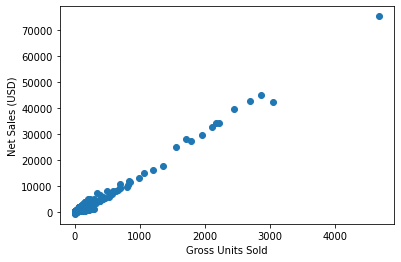

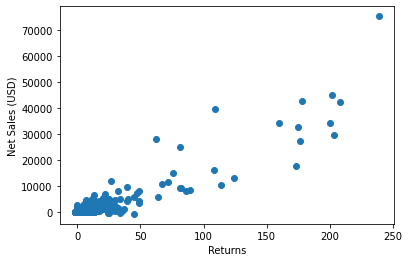

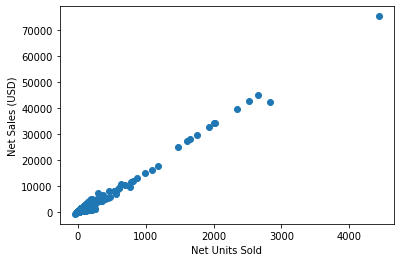

In [0]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Net Sales (USD)'])
    plt.ylabel('Net Sales (USD)')
    plt.xlabel(column)
scatter(Recrutiment, 'Gross Units Sold')
scatter(Recrutiment, 'Returns')
scatter(Recrutiment, 'Net Units Sold')

# Bivariate Analysis

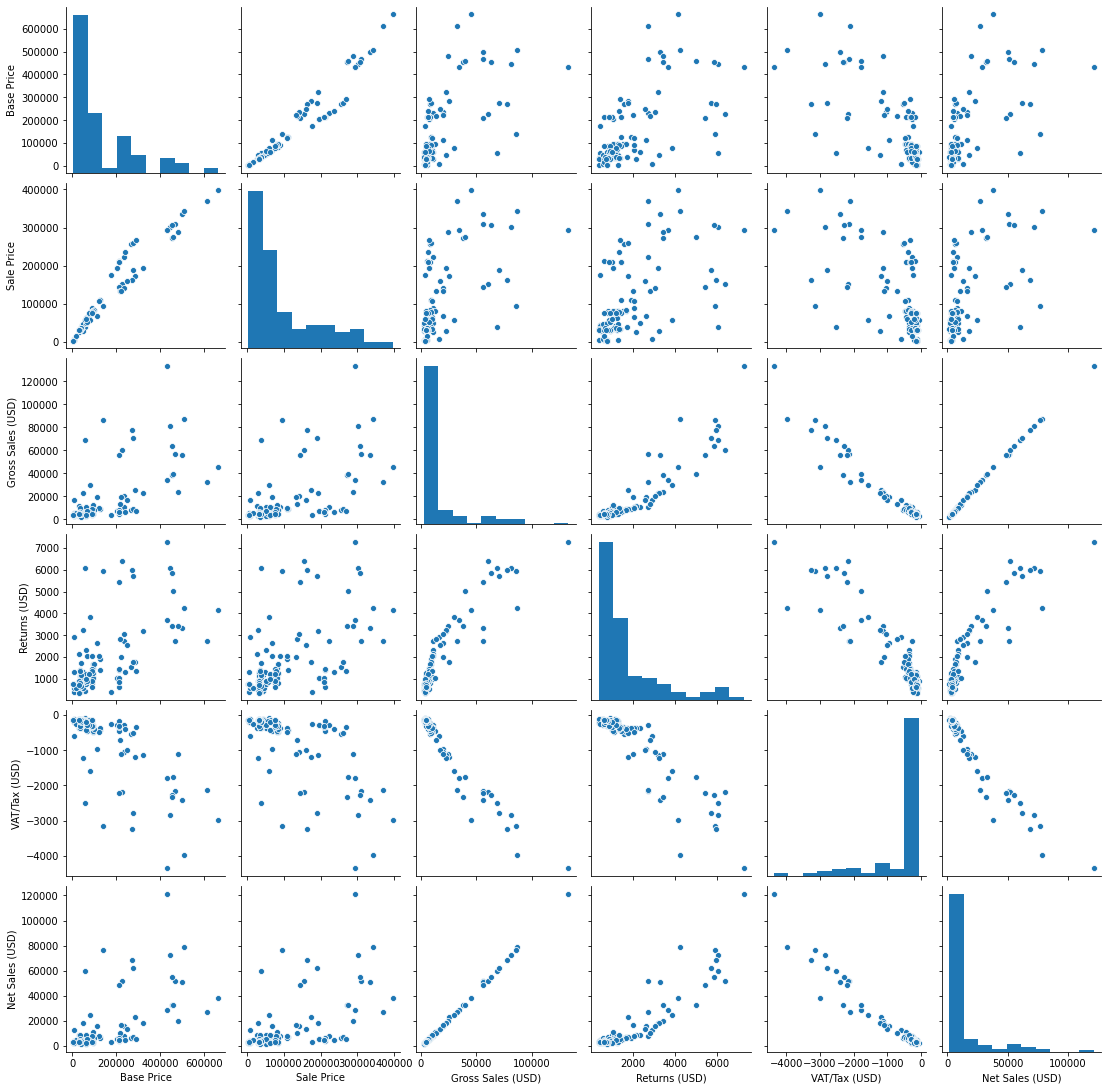

In [0]:
sns.pairplot(NEWRecrutiment4, vars=['Base Price','Sale Price','Gross Sales (USD)','Returns (USD)', 'VAT/Tax (USD)','Net Sales (USD)'])


We can see the linear relationship between Gross Sales, Returns, VAT/Tax and Net Sales

estimate the discount percentage that was applied
during the sales

Analysts often find it helpful to plot gross sales lines and net sales lines together on a graph to determine how each value is trending over a period of time. If both lines increase together, this could indicate trouble with product quality because costs are also increasing, but it may also be an indication of a higher volume of discounts. These figures must be watched over a moderate period of time to make an accurate determination of their significance. Gross sales can be used to show consumer spending habits.

## Import and Visualize a Power BI dashboard

In [0]:
from IPython.display import IFrame

powerBiEmbed = 'https://app.powerbi.com/reportEmbed?reportId=b3a6adfe-b290-4df6-be58-1a2989ff263a&autoAuth=true&ctid=3ed577fd-4a9e-494d-b138-7d118bc0b9ca&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLXNvdXRoLWFmcmljYS1ub3J0aC1hLXByaW1hcnktcmVkaXJlY3QuYW5hbHlzaXMud2luZG93cy5uZXQvIn0%3D'

IFrame(powerBiEmbed, width=800, height=600)

# Define the periods and calculate the discount

In [0]:
Recrutiment1 = Recrutiment[:3924]

In [0]:
Recrutiment2 = Recrutiment[3925:]

In [0]:
#The pic in Gross sales in what day
maximum = Recrutiment2['Gross Sales (USD)'].max()
maximum2 = Recrutiment2['Net Sales (USD)'].max()
maximum3 = Recrutiment2['Gross Units Sold'].max()

In [0]:
maximum1 = Recrutiment1['Gross Sales (USD)'].max()
maximum21 = Recrutiment1['Net Sales (USD)'].max()
maximum31 = Recrutiment1['Gross Units Sold'].max()

In [0]:
Recrutiment2[Recrutiment2['Gross Sales (USD)']==maximum]['Date']


Date2
2017-12-25    25/12/2017
Name: Date, dtype: object

In [0]:
Recrutiment2[Recrutiment2['Net Sales (USD)']==maximum2]['Date']

Date2
2017-12-25    25/12/2017
Name: Date, dtype: object

In [0]:
Recrutiment2[Recrutiment2['Gross Units Sold']==maximum3]['Date']

Date2
2017-12-25    25/12/2017
Name: Date, dtype: object

In [0]:
Recrutiment2.Date.value_counts()

10/01/2018    106
24/12/2017    101
23/12/2017     96
08/12/2017     94
22/12/2017     93
             ... 
01/12/2017     31
17/12/2017     31
20/12/2017     31
19/12/2017     30
18/12/2017     28
Name: Date, Length: 62, dtype: int64

Our day is 25th December ==> Christmas

In [0]:
Recrutiment2[(Recrutiment2['Date']=='25/12/2017') & (Recrutiment2['Currency']=='USD')]['Sale Price']

Date2
2017-12-25    13.63
2017-12-25    14.99
2017-12-25     8.99
2017-12-25    12.09
2017-12-25    14.99
2017-12-25    14.99
2017-12-25    14.99
2017-12-25    14.99
2017-12-25    24.99
2017-12-25    13.63
2017-12-25    14.99
2017-12-25    14.99
Name: Sale Price, dtype: float64

In [0]:
Recrutiment2['Sale Price'].value_counts()

22.99     563
13.79     365
24.99     295
17.99     169
34.99     142
         ... 
620.00      1
26.52       1
352.00      1
57.25       1
279.99      1
Name: Sale Price, Length: 118, dtype: int64

In [0]:
this = Recrutiment1[Recrutiment1['Sale Price']>16.99]['Sale Price']

I will suppose the normal price is 22.99(the most frequent) and the discount sale is 16.99.
The discount is 26 and 35 For the first period and second period respectively

In [0]:
Recrutiment['Datetime'] = datelist
Recrutiment['year'] = [d.year for d in Recrutiment.Datetime]
Recrutiment['month'] = [d.strftime('%b') for d in Recrutiment.Datetime]
Recrutiment['year_month']=Recrutiment['month'] + str(Recrutiment['year'])

In [0]:
Recrutiment['year'] = [d.year for d in Recrutiment.Datetime]

In [0]:
B=[[i for j in range(8)] for i in range(1,17)]

In [0]:
B

[[1, 1, 1, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3, 3, 3, 3],
 [4, 4, 4, 4, 4, 4, 4, 4],
 [5, 5, 5, 5, 5, 5, 5, 5],
 [6, 6, 6, 6, 6, 6, 6, 6],
 [7, 7, 7, 7, 7, 7, 7, 7],
 [8, 8, 8, 8, 8, 8, 8, 8],
 [9, 9, 9, 9, 9, 9, 9, 9],
 [10, 10, 10, 10, 10, 10, 10, 10],
 [11, 11, 11, 11, 11, 11, 11, 11],
 [12, 12, 12, 12, 12, 12, 12, 12],
 [13, 13, 13, 13, 13, 13, 13, 13],
 [14, 14, 14, 14, 14, 14, 14, 14],
 [15, 15, 15, 15, 15, 15, 15, 15],
 [16, 16, 16, 16, 16, 16, 16, 16]]

In [0]:
flat_list = [item for sublist in B for item in sublist]

In [0]:
flat_list.remove(1)
flat_list.remove(5)
flat_list.remove(9)
flat_list.remove(13)
#flat_list.insert(index, elem)

In [0]:
NEWRecrutiment4['Week'] = flat_list

Seasonality in Net Sales (USD) time series

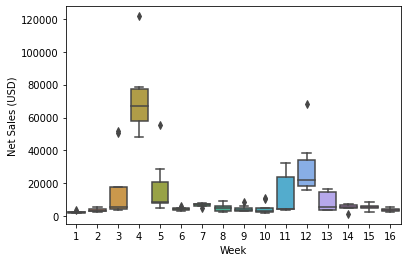

In [0]:
# Draw Plot

sns.boxplot(x='Week', y='Net Sales (USD)', data=NEWRecrutiment4)


plt.show()

Time series Analysis

In [0]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
df20 = Recrutiment['Net Sales (USD)']

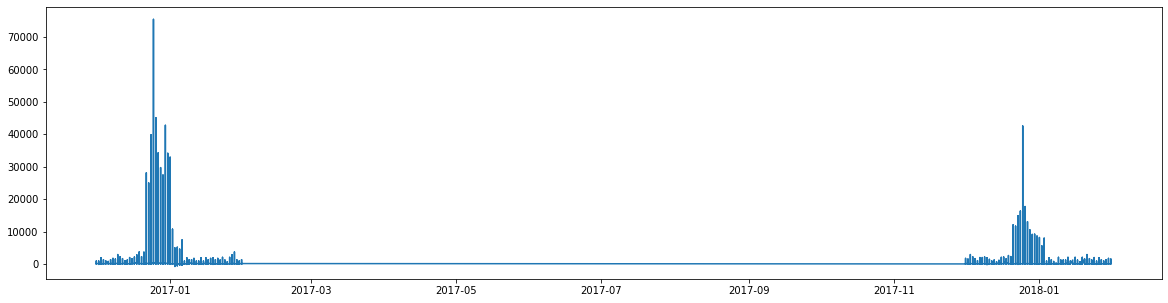

In [0]:
plt.figure(figsize=(20,5))
plt.plot(df20.index, df20.values)
plt.show()

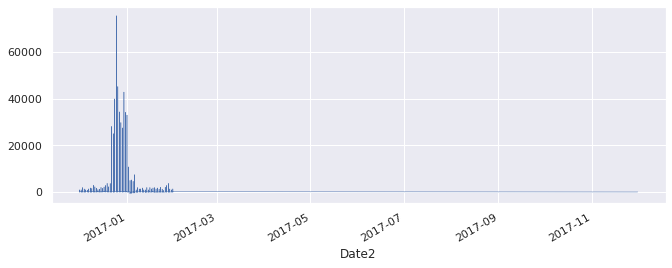

In [0]:
sns.set(rc={'figure.figsize':(11, 4)})
Recrutiment1['Net Sales (USD)'].plot(linewidth=0.5)

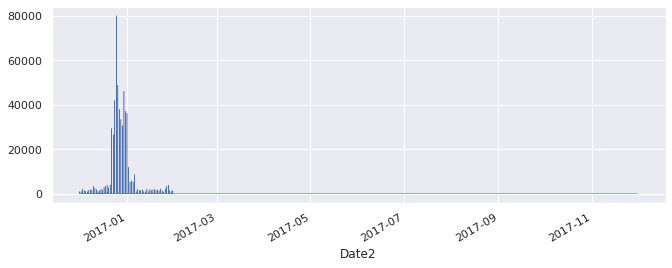

In [0]:
Recrutiment1['Gross Sales (USD)'].plot(linewidth=0.5)

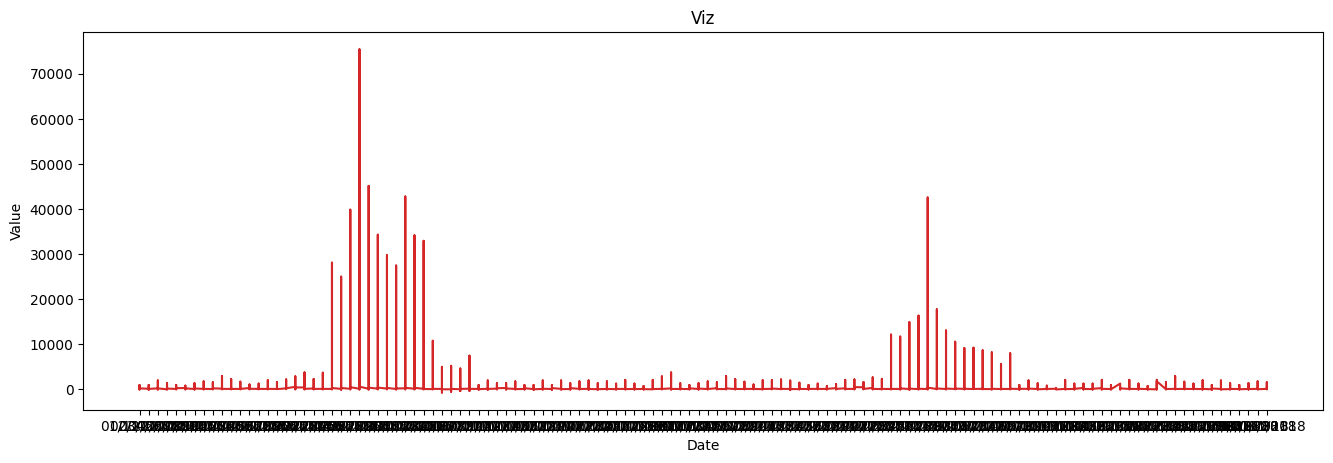

In [0]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=Recrutiment.Date, y=Recrutiment['Net Sales (USD)'], title='Viz')    

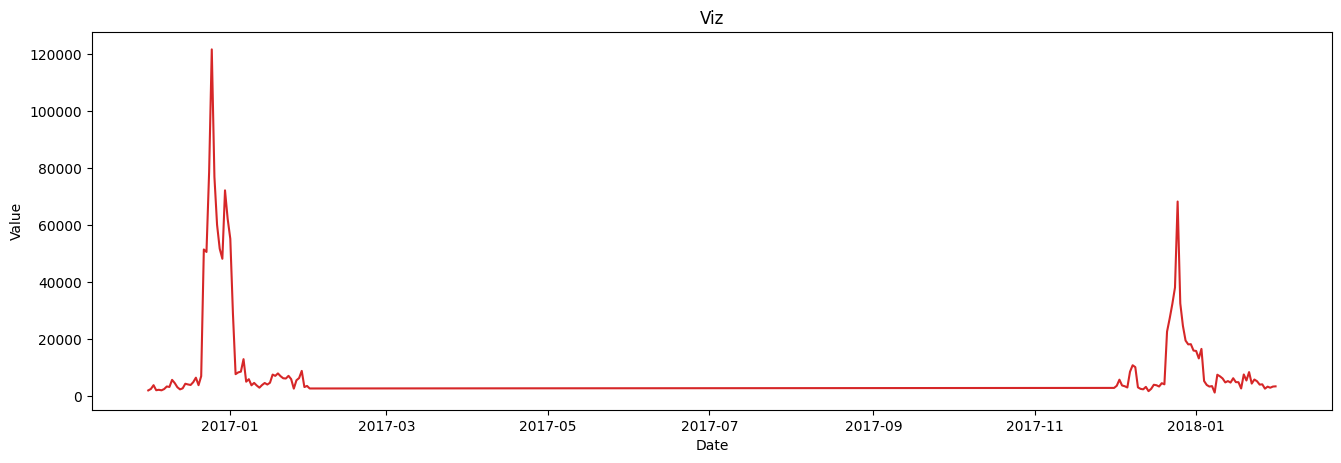

In [0]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=NEWRecrutiment4.index, y=NEWRecrutiment4['Net Sales (USD)'], title='Viz')   

Is our time seies stationary
Those values should be constant

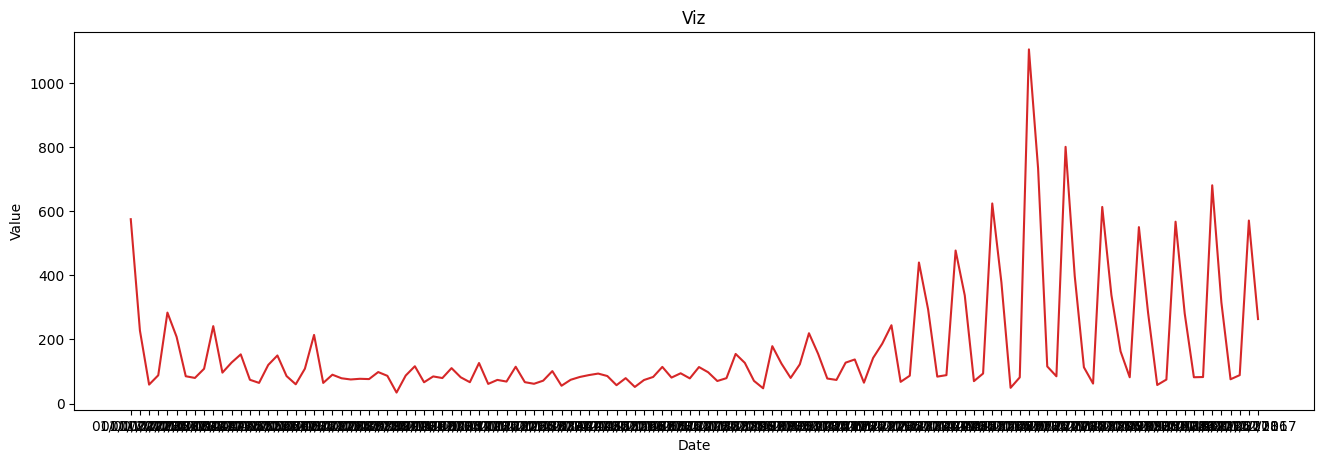

In [0]:
plot_df(df, x=NEWRecrutiment3.index, y=NEWRecrutiment3['Net Sales (USD)'], title='Viz')   

In [0]:
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt#loading Data

out = smt.stattools.acovf(NEWRecrutiment3['Net Sales (USD)'])
 #autocovariance upto 20 values

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



In [0]:
out = pd.DataFrame(out)

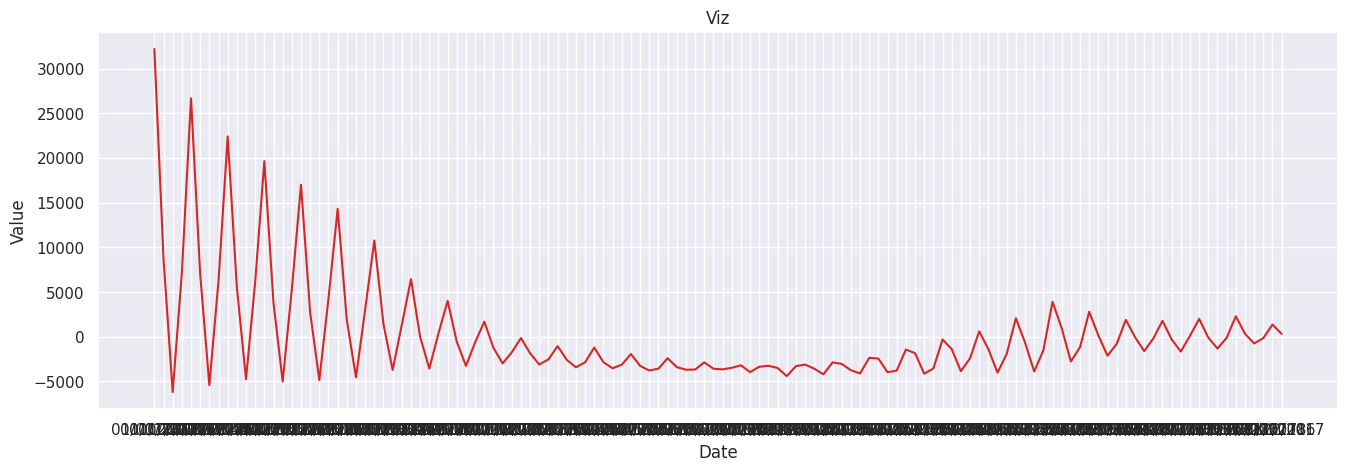

In [0]:
plot_df(df, x=NEWRecrutiment3.index, y=out, title='Viz')   

Conclusion : A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times.

TEST is it stationary :Dicky Fuller ADF and KPSS


In [0]:
from statsmodels.tsa.stattools import adfuller, kpss
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    print('Null Hypothesis: Unit Root Present')
    print('Test Statistic < Critical Value => Reject Null')
    print('P-Value =< Alpha(.05) => Reject Null\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value {key}'] = value
    print (dfoutput, '\n')

def kpss_test(timeseries, regression='c'):
    # Whether stationary around constant 'c' or trend 'ct
    print ('Results of KPSS Test:')
    print('Null Hypothesis: Data is Stationary/Trend Stationary')
    print('Test Statistic > Critical Value => Reject Null')
    print('P-Value =< Alpha(.05) => Reject Null\n')
    kpsstest = kpss(timeseries, regression=regression)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output[f'Critical Value {key}'] = value
    print (kpss_output, '\n')

In [0]:
adf_test(NEWRecrutiment3['Net Sales (USD)'])

Results of Dickey-Fuller Test:
Null Hypothesis: Unit Root Present
Test Statistic < Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic                  -1.302951
p-value                          0.627821
#Lags Used                       5.000000
Number of Observations Used    118.000000
Critical Value 1%               -3.487022
Critical Value 5%               -2.886363
Critical Value 10%              -2.580009
dtype: float64 



P-value>0.5 non stationnaire

In [0]:
kpss_test(NEWRecrutiment3['Net Sales (USD)'],regression='c')

Results of KPSS Test:
Null Hypothesis: Data is Stationary/Trend Stationary
Test Statistic > Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic          0.565845
p-value                 0.026837
Lags Used              13.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64 



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



Our series is not stationary but trend stationary

Other techniques for analyzing seasonality include autocorrelation plots, which plot the correlation coefficients of the time series with itself at different time lags

However, if you want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot. More on the ACF in the upcoming sections. But when there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



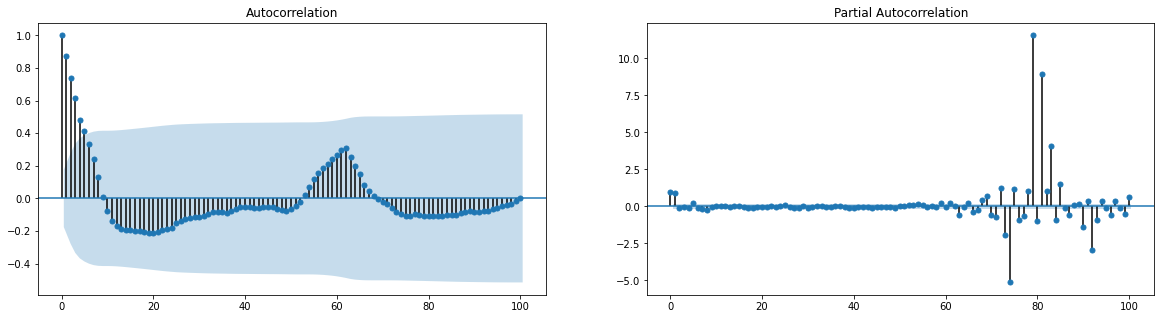

In [0]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(NEWRecrutiment4['Net Sales (USD)'].values, lags=100, alpha=0.05, ax=axes[0])
plot_pacf(NEWRecrutiment4['Net Sales (USD)'].values, lags=100, alpha=0.05, ax=axes[1])
plt.show()


Stationarize it : use differentiating (lag)


Differencing

Differencing is subtracting an observation from an observation at the previous time step. Differencing generates a time series of the changes between raw data points and helps us create a time series that is stationary. Normally, the correct amount of differencing is the lowest order of differencing that yields a time series which fluctuates around a well-defined mean value and whose autocorrelation function (ACF) plot decays fairly rapidly to zero. After each differencing operation, like we perform below, we can conduct an Augmented Dickey-Fuller (adf) and Kwiatkowski-Phillips-Schmidt-Shin (kpss) test to check for stationarity.


Results of Dickey-Fuller Test:
Null Hypothesis: Unit Root Present
Test Statistic < Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic                -6.814227e+00
p-value                        2.078855e-09
#Lags Used                     3.000000e+00
Number of Observations Used    1.190000e+02
Critical Value 1%             -3.486535e+00
Critical Value 5%             -2.886151e+00
Critical Value 10%            -2.579896e+00
dtype: float64 

Results of KPSS Test:
Null Hypothesis: Data is Stationary/Trend Stationary
Test Statistic > Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic          0.061691
p-value                 0.100000
Lags Used              13.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64 



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



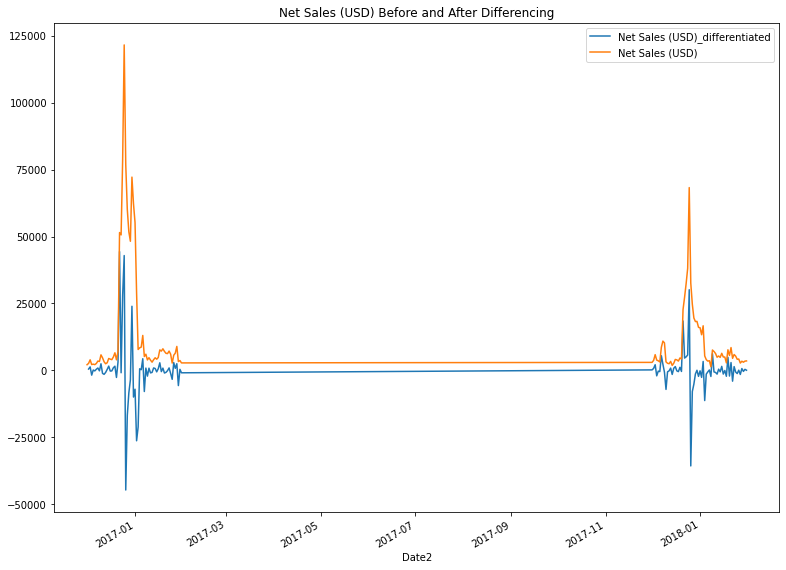

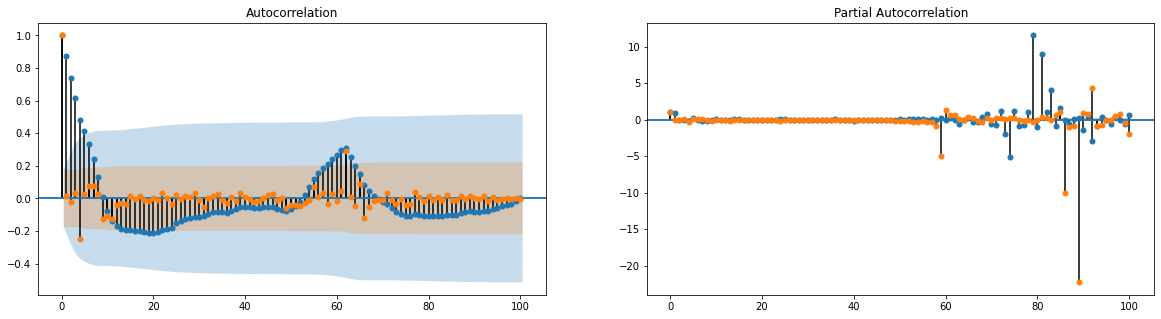

In [0]:
NEWRecrutiment4['Net Sales (USD)_differentiated']= NEWRecrutiment4['Net Sales (USD)'].diff()
NEWRecrutiment4['Net Sales (USD)_differentiated'].dropna(inplace=True)
adf_test(NEWRecrutiment4['Net Sales (USD)_differentiated'])
kpss_test(NEWRecrutiment4['Net Sales (USD)_differentiated'])
NEWRecrutiment4[['Net Sales (USD)_differentiated', 'Net Sales (USD)']].plot(figsize=(13, 10), title='Net Sales (USD) Before and After Differencing')
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(NEWRecrutiment4['Net Sales (USD)'].values, lags=100, alpha=0.05, ax=axes[0])
plot_pacf(NEWRecrutiment4['Net Sales (USD)'].values, lags=100, alpha=0.05, ax=axes[1])
plot_acf(NEWRecrutiment4['Net Sales (USD)_differentiated'].values, lags=100, alpha=0.05, ax=axes[0])
plot_pacf(NEWRecrutiment4['Net Sales (USD)_differentiated'].values, lags=100, alpha=0.05, ax=axes[1])
plt.show()


We decompose the Sales time series into those components

    Level: The average value in the series.
    Trend: The increasing or decreasing value in the series.
    Seasonality: The repeating short-term cycle in the series.
    Noise: The random variation in the series.

There is two models: multiplicative et additive
y(t) = Level + Trend + Seasonality + Noise
y(t) = Level * Trend * Seasonality * Noise

In [0]:
NEWRecrutiment2

,Package,Product(ID#),Gross Units Sold,Returns,Net Units Sold,Base Price,Sale Price,Gross Sales (USD),Returns (USD),VAT/Tax (USD),Net Sales (USD)
Date2,,,,,,,,,,,
2016-12-01,-36,3283308,122,35,87,31677.68,31560.35,2801.672383,569.054400,-104.451583,2128.166400
2016-12-02,-31,2827293,140,23,117,5652.73,5277.85,3185.490994,381.889800,-162.691982,2640.909212
2016-12-03,-41,3739323,209,37,172,30542.63,30439.73,4795.447907,690.289800,-149.527740,3955.630367
2016-12-04,-34,3100902,140,44,96,59039.67,58300.99,3173.091742,908.209600,-74.162559,2190.719583
2016-12-05,-39,3556917,142,32,110,6774.60,6035.77,3149.020812,636.995000,-169.436829,2342.588983
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-27,-44,4012932,173,49,124,61774.55,61035.47,3948.728920,995.980000,-211.103654,2741.645267
2018-01-28,-42,3830526,200,40,160,32312.61,31560.02,4427.067398,816.994600,-168.924460,3441.148338
2018-01-29,-41,3739323,181,41,140,4287.62,3897.78,3983.934865,771.845200,-144.800057,3067.289608


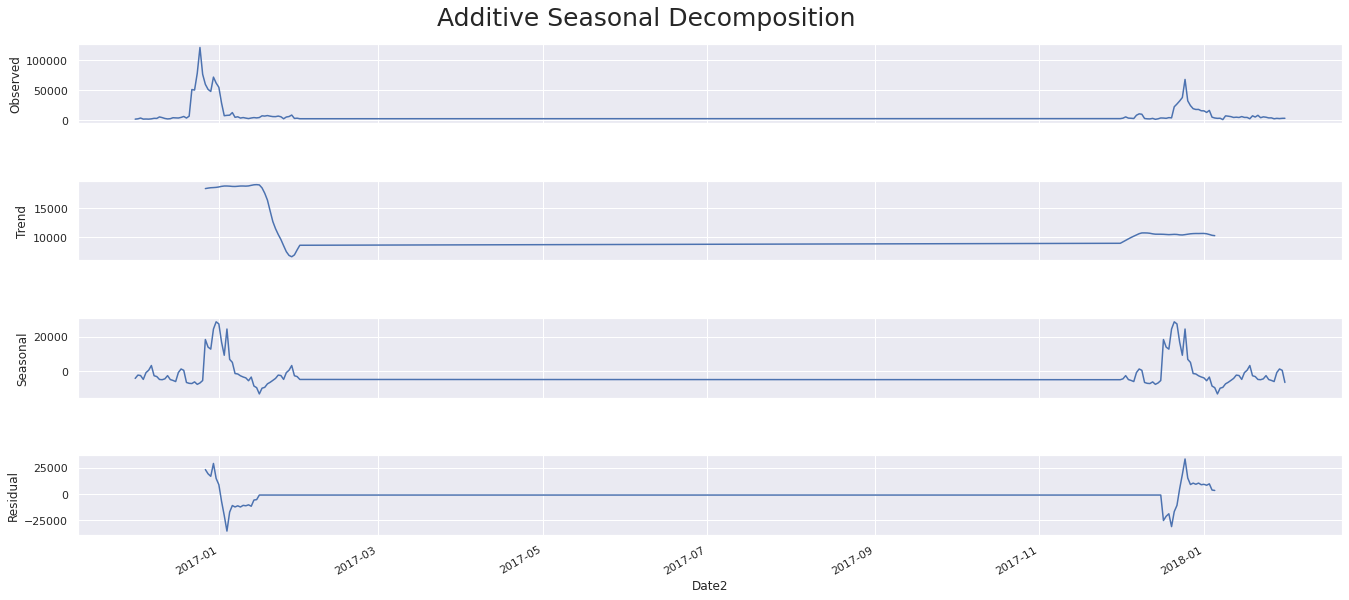

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_df = pd.DataFrame(NEWRecrutiment2['Net Sales (USD)'])
seasonal_a = seasonal_decompose(decomposition_df, model='additive',freq = 52)
#seasonal_m = seasonal_decompose(decomposition_df.values, model='multiplicative',freq = 30)
fig_1 = seasonal_a.plot()
#fig_2 = seasonal_m.plot()
fig_1.suptitle('Additive Seasonal Decomposition', fontsize=25)
fig_1.set_figheight(10)
fig_1.set_figwidth(20)

plt.show()


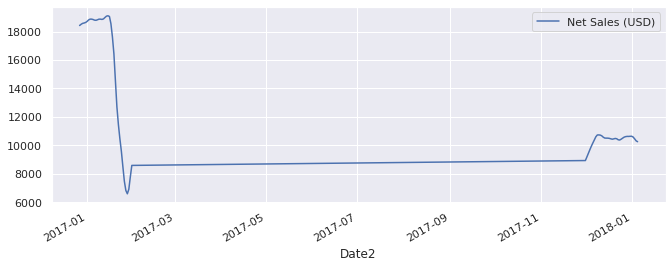

In [0]:
seasonal_a.trend.plot()

In a multiplicative time series, the decomposed components multiply together to make the time series. In a multiplicative series there is increasing trend, the amplitude of seasonal activity increases and everything becomes more exaggerated. Multiplicative trend looks more like an exponential curve and multiplicative seasonality has waves that grow in amplitude of the course of time.

In an additive model we assume the componenents of the time series have an additive effect, that the amplitude of the seasonal effect is roughly the same, that the size of the residuals are mostly constant.
==> Additif

In [0]:
decomposition_df2 = pd.DataFrame(NEWRecrutiment2['Net Sales (USD)'])

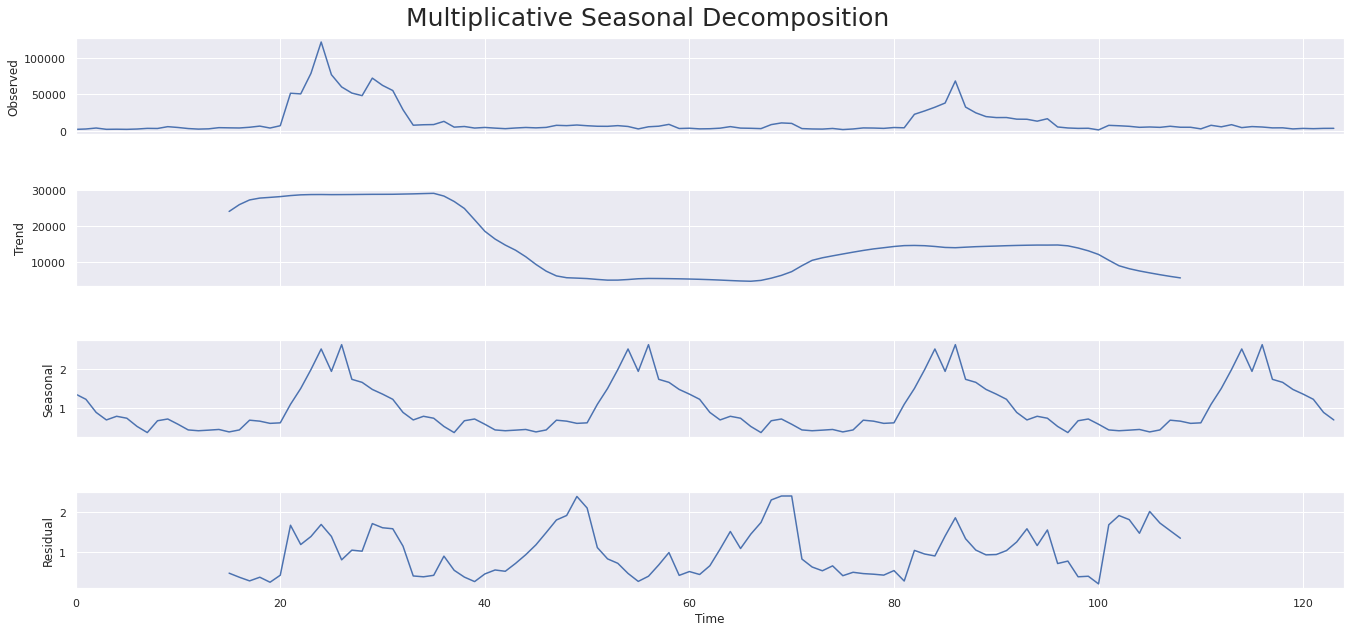

In [0]:
seasonal_m = seasonal_decompose(decomposition_df2.values, model='multiplicative',freq = 30)
fig_2 = seasonal_m.plot()
fig_2.suptitle('Multiplicative Seasonal Decomposition', fontsize=25)
fig_2.set_figheight(10)
fig_2.set_figwidth(20)

HPF filter

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



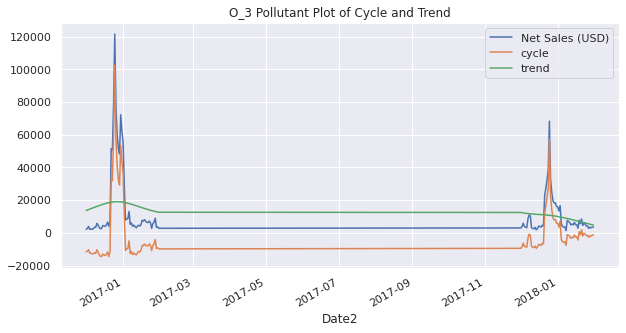

In [0]:
import statsmodels.api as sm
O3_cycle, O3_trend = sm.tsa.filters.hpfilter(decomposition_df2, lamb=129600)
filter_df = NEWRecrutiment2[['Net Sales (USD)']]
filter_df['cycle'] = O3_cycle
filter_df['trend'] = O3_trend

filter_df.plot(figsize=(10, 5), title='O_3 Pollutant Plot of Cycle and Trend')



Compare two periods
Get small seasonal data sets for each region. 3) For each region-season separate the media value from the distribution structure. 4) Compare media estimates between two years. 5) Compare distribution structure variations between two years
Difference
Linear model
bivariate time series analysis

In [0]:
Recrutiment_period1 = NEWRecrutiment4[:62]

Recrutiment_period2 = NEWRecrutiment4[63:]

In [0]:
Recrutiment_period1['Net Sales (USD)'].describe()

count        62.000000
mean      16283.804401
std       25211.635139
min        2128.166400
25%        3728.759254
50%        5429.216781
75%        8349.200128
max      121579.466980
Name: Net Sales (USD), dtype: float64

In [0]:
Recrutiment_period2['Net Sales (USD)'].describe()

count       61.000000
mean      9620.309584
std      11351.497772
min       1370.420925
25%       3545.211180
50%       4991.629248
75%      10279.297530
max      68288.562491
Name: Net Sales (USD), dtype: float64

In [0]:
Recrutiment2.Country.value_counts()

United States         343
United Kingdom        199
Australia             177
Russian Federation    160
Germany               149
                     ... 
Serbia                  1
Cambodia                1
Myanmar (Burma)         1
Guatemala               1
Egypt                   1
Name: Country, Length: 103, dtype: int64

In [0]:
Recrutiment1.Country.value_counts()

United States          364
United Kingdom         232
Australia              199
Germany                191
Russian Federation     172
                      ... 
Moldova Republic of      1
Laos                     1
Martinique               1
Mongolia                 1
Kenya                    1
Name: Country, Length: 117, dtype: int64

Cross-correlation is the comparison of two different time series to detect if there is a correlation between metrics with the same maximum and minimum values. For example: “Are two audio signals in phase?

https://www.geeksforgeeks.org/python-pandas-series-cov-to-find-covariance/ 
Covariance between two series

In [0]:
x= Recrutiment_period1['Net Sales (USD)']
y = Recrutiment_period2['Net Sales (USD)']
cc1 = np.correlate(x - x.mean(), y - y.mean())[0] # Remove means
cc1 /= (len(x) * x.std() * y.std()) #Normalise by number of points and product of standard deviations
#cc2 = np.corrcoef(x, y)[0, 1]
print(cc1)

0.7283168644267012


In [0]:
!pip install dtaidistance

     |████████████████████████████████| 327kB 2.8MB/s 
  Created wheel for dtaidistance: filename=dtaidistance-1.2.3-cp36-cp36m-linux_x86_64.whl size=624260 sha256=12751d98a6b6e19f50bd7024eb2e531281afa3b2a7692a69fea926172fa8aba6
  Stored in directory: /root/.cache/pip/wheels/9f/9a/74/42c5b9dc714bb5a70b426df08cc860e6a741bc199004873e1b
Successfully built dtaidistance


In [0]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
s1= Recrutiment_period1['Net Sales (USD)']
s2 = Recrutiment_period2['Net Sales (USD)']
distance = dtw.distance(s1,s2)
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path, filename="warp.png")
distance


75197.48319143995

In [0]:
distance

75197.48319143995

In [1]:
!git init

Initialized empty Git repository in /content/.git/


In [2]:
!git config — global user.email “sdiridorsaf4@gmail.com”
!git config — global user.name “Dorsaf-Sdiri”

usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-regex]
    --get-all             get all values: key [value-regex]
    --get-regexp          get values for regexp: name-regex [value-regex]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value_regex]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-regex]
    --unset-all           remove all matches: name [value-regex]
    --rename-section      rename section: old-name new-name
    --remove-section      remove a section: name
    -l, --list            list all
 

In [0]:
!git add -A

In [4]:
!git commit -m “first commit”

error: pathspec 'commit”' did not match any file(s) known to git.
